# NSL Notebook 03

In [1]:
from default import *

## Exercise 03.1

Compute at time t = 0 via Monte Carlo the European call-option price, $C[S(0),\,0]$, and put-option
price, $P [S(0),\,0]$

This problem is analytically solvable (thanks to **Black-Scholes** solution) and the results are:

* $C[S(0),\,0]=14.975790778311286$



* $P[S(0),\,0]=5.4595325819072364$

for the following parameters:

* asset price $S(0)=100$
* delivery time $T=1$
* strike price $K=100$
* risk free interest rate $r=0.1$
* volatility $\sigma=0.25$

There are two method to compute them using **MC**:

* **not-recursive method**

$$C[S(0),\,0]=e^{-rT}\,\max\left(0,\,S[T]-K\right)\qquad P[S(0),\,0]=e^{-rT}\,\max\left(0,\,K-S[T]\right)$$ 

$$\text{with}\quad S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

* **recursive method**, with this method the total time $[0,\,T]$ has been divided in $100$ intervals to compute the final $S[T]$


$$C[S(0),\,0]=e^{-rT}\,\max\left(0,\,S[T]-K\right)\qquad P[S(0),\,0]=e^{-rT}\,\max\left(0,\,K-S[T]\right)$$ 

$$\text{with}\quad S(t_{i+1}) =\\ S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

$$ Z_i \sim \mathcal{N}(0,1) $$

Below the results of $C[S(0),\,0]$ and $P [S(0),\,0]$ for the two methods using $M=10^5$ and $N=100$ to compute averages and uncertainties using blocking method.

The trend of plots, for both methods, is a convergence towards the analytic values.

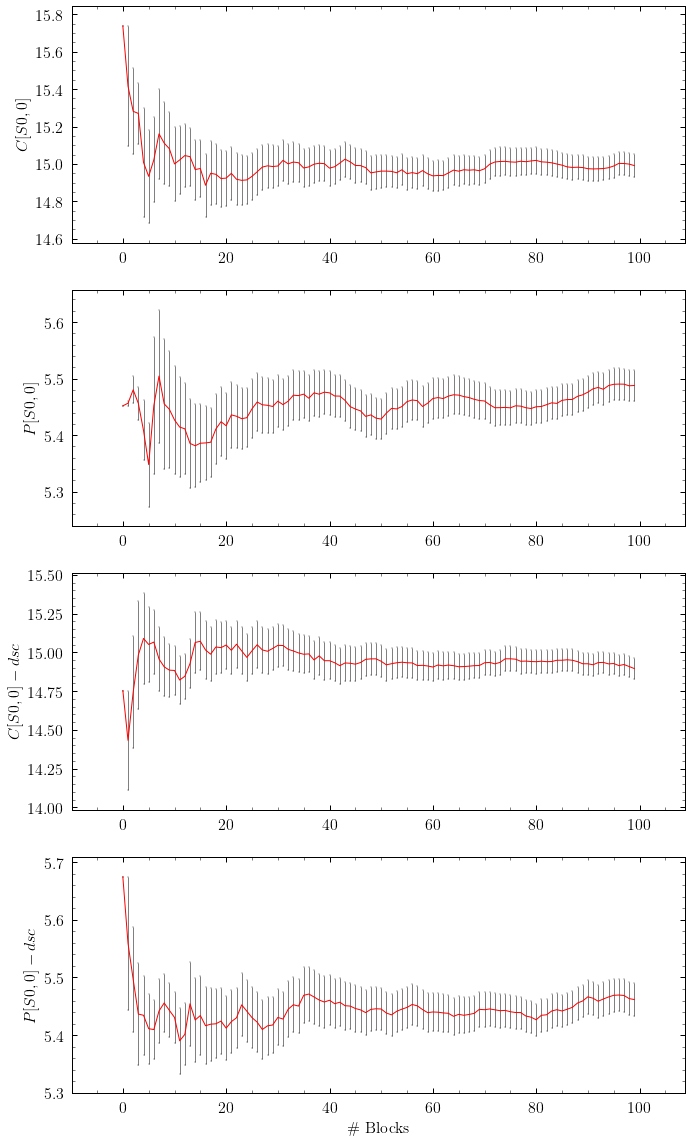

In [6]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(11,20))

# load C[S0,0] results
df1 = pd.read_csv("call-blk.csv", header=None, names=["mean","mean_err"])
df1["mean"].plot.line(yerr=df1["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.3, 
                      ax=ax1)

# load P[S0,0] results
df2 = pd.read_csv("put-blk.csv", header=None, names=["var","var_err"])
df2["var"].plot.line(yerr=df2["var_err"], 
                     color='r', 
                     ecolor='gray', 
                     capthick=0.3, 
                     ax=ax2)

# load C[S0,0] discrete results
df1 = pd.read_csv("call-dsc-blk.csv", header=None, names=["mean","mean_err"])
df1["mean"].plot.line(yerr=df1["mean_err"], 
                      color='r', 
                      ecolor='gray', 
                      capthick=0.3, 
                      ax=ax3)

# load P[S0,0] discrete results
df2 = pd.read_csv("put-dsc-blk.csv", header=None, names=["var","var_err"])
df2["var"].plot.line(yerr=df2["var_err"], 
                     color='r', 
                     ecolor='gray', 
                     capthick=0.3, 
                     ax=ax4)

ax1.set_ylabel("$C[S0,0]$");
ax2.set_ylabel("$P[S0,0]$");

ax3.set_ylabel("$C[S0,0]-dsc$");
ax4.set_ylabel("$P[S0,0]-dsc$");

ax4.set_xlabel("\# Blocks");